In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE


In [98]:
random_state = 42

In [99]:
#load data on Yanqi Hong's computer
data = pd.read_csv('E:\DATA\TUD\Master\TUD_Master_Y1\Q1\EE4C12 Machine Learning For Electrical Engineering\CodeLab\Project\S&S_SZD (1)\Data\Project_Data_EE4C12_S&S_SZD.csv')
data

# # load data on Zhixuan's computer
# data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
# data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [100]:
data.iloc[:, -5:].describe()

,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
count,55456.000000,55456.000000,55456.000000,55456.000000,55456.000000
mean,2.066735,0.736794,0.944334,0.109339,0.109481
std,8.863908,8.429259,11.958688,0.518148,0.524319
min,0.000011,0.000030,0.000006,0.000012,0.000060
25%,0.002479,0.005719,0.003619,0.004051,0.004649
50%,0.006983,0.024925,0.014222,0.011859,0.012090
75%,0.062326,0.122559,0.102257,0.053111,0.042975
max,237.442989,337.868165,566.736776,40.513872,54.898662


In [101]:
# 

Patient_count = data['Patient'].value_counts(sort=False)
Patient_ID = Patient_count.index.values
Patient_num = len(Patient_ID)
Patient_ID_inv = dict(zip(Patient_ID, range(Patient_num)))


itp_idx = []
itp_idx.append(0)
for i in range(1, len(data)):
    if data['Patient'][i] != data['Patient'][i-1]:
        itp_idx.append(i)
itp_idx.append(len(data))

patient_data_list = []
for i in range(Patient_num):
    patient_data_list.append([]) 

for i in range(1, len(itp_idx)):
    data_temp = data.iloc[itp_idx[i-1]:itp_idx[i]]
    Patient_temp = data_temp['Patient'].iloc[0]
    patient_data_list[Patient_ID_inv[Patient_temp]].append(data_temp)




In [102]:
test_size = 0.25
data_train, data_test = train_test_split(data, test_size=test_size, random_state=random_state, shuffle=True)

In [103]:
X_train_scaled = np.zeros([0, 360])
X_test_scaled = np.zeros([0, 360])
y_train = np.zeros(0, dtype=int)
y_test = np.zeros(0, dtype=int)

for i in range(Patient_num):
    for j in range(len(patient_data_list[i])):
        idx_search = patient_data_list[i][j].index
        
        idx_search_train = data_train.index.intersection(idx_search)
        idx_search_test = data_test.index.intersection(idx_search)
        
        data_search_train = data_train.loc[idx_search_train]
        data_search_test = data_test.loc[idx_search_test]
    
        X_search_train = data_search_train.iloc[:, 2:].values
        X_search_test = data_search_test.iloc[:, 2:].values
        
        scaler = StandardScaler().fit(X_search_train)
        X_search_train = scaler.transform(X_search_train)
        X_search_test = scaler.transform(X_search_test)
        
        X_train_scaled = np.concatenate((X_train_scaled, X_search_train), axis=0)
        X_test_scaled = np.concatenate((X_test_scaled, X_search_test), axis=0)
        
        y_train_search = np.int32(data_search_train['annotation'].values)
        y_test_search = np.int32(data_search_test['annotation'].values)
        
        y_train = np.concatenate((y_train, y_train_search))
        y_test = np.concatenate((y_test, y_test_search))
        
X_train_scaled, y_train = sklearn.utils.shuffle(X_train_scaled, y_train, random_state=random_state)
X_test_scaled, y_test = sklearn.utils.shuffle(X_test_scaled, y_test, random_state=random_state)

test on lr

The original number of training feature is:  360


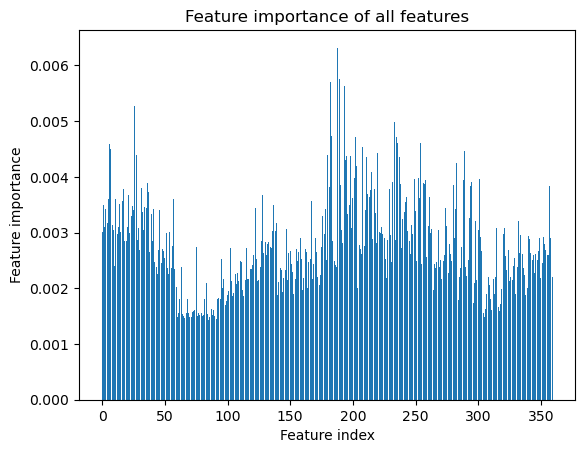

The current number of training feature after feature selection is:  120


In [104]:

# Feature selection by extra tree classifier

print("The original number of training feature is: ", X_train_scaled.shape[1])
clf_etc = ExtraTreesClassifier(random_state=random_state).fit(X_train_scaled, y_train) # fit the model
feature_importances = clf_etc.feature_importances_  # get the feature importance

plt.bar(range(len(feature_importances)), feature_importances)   # plot the feature importance
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.title("Feature importance of all features")
plt.show()

important_feature_indices=np.argsort(feature_importances)   # sort the feature importance  
important_feature_indices_cut=important_feature_indices[:int(len(important_feature_indices)/1.5)]   # select the most important features  

X_train_selected=np.delete(X_train_scaled,important_feature_indices_cut,1)    # delete the least important features
X_test_selected=np.delete(X_test_scaled,important_feature_indices_cut,1)      # delete the least important features
print("The current number of training feature after feature selection is: ", X_train_selected.shape[1])

In [105]:
# Generate the performance value and confusion matrix 

def performance_eval(true, pred, score_display=True, matrix_display=False, result_return=False):
    Accuracy = accuracy_score(true, pred)
    F1 = accuracy_score(true, pred)
    Precision = accuracy_score(true, pred)
    Recall = accuracy_score(true, pred)
    
    if score_display==True:
        print("Accuracy: " + str(Accuracy))
        print("F1 score: " + str(F1))
        print("Recall score: " + str(Recall))
        print("Precision score: " + str(Precision))
        
    if matrix_display==True:
        label = ['Non-seizure', 'Transition','Seizure']
        cm = confusion_matrix(true, pred)
        cm_display = ConfusionMatrixDisplay(cm, display_labels=label).plot()
        plt.show(cm_display)
    
    if result_return:
        return Accuracy, F1, Precision, Recall

Accuracy: 0.6784477784189267
F1 score: 0.6784477784189267
Recall score: 0.6784477784189267
Precision score: 0.6784477784189267


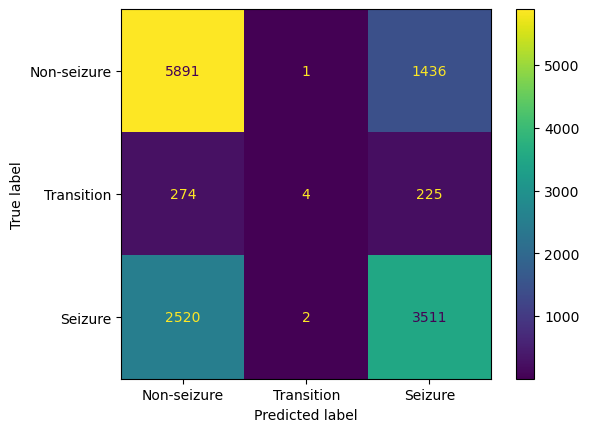

In [106]:
#Logistic regression model construction for all train sets
clf_lr = LogisticRegression(max_iter=1000, random_state=random_state).fit(X_train_selected, y_train)
# Generate the performance value and confusion matrix on test set

y_pred = clf_lr.predict(X_test_selected)
performance_eval(y_test, y_pred, matrix_display=True)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\skyho\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\skyho\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy: 0.6781592613964224
F1 score: 0.6781592613964224
Recall score: 0.6781592613964224
Precision score: 0.6781592613964224


C:\Users\skyho\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


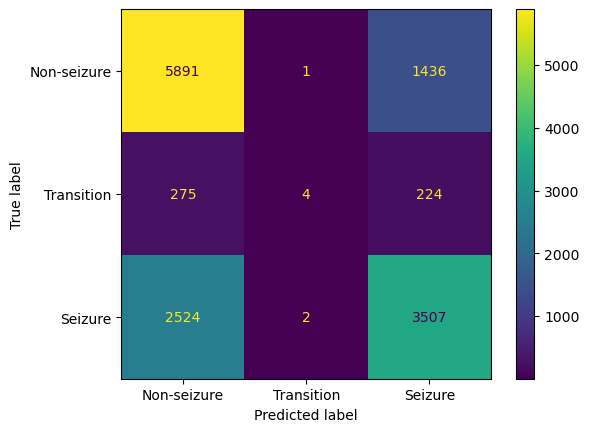

-----------------Logistic Regression Summary-----------------
Best parameters: {'penalty': None, 'l1_ratio': 0.0604, 'C': 6.544854558603141}
Best score in cross validation process: 0.673951687404861
Accuracy in test set with best parameters: 0.6781592613964224
-------------------------------------------------------------


In [107]:
# Random search for hyperparameter tuning

n_iter_search = 3 # number of iterations for random search
clf_lr_rs = LogisticRegression(max_iter=500, solver='saga') # define the model

# define the hyperparameter space
C = 1/np.power(10, np.arange(-4, 1, 1e-4))  
param_dist = {"penalty": ['l1', 'l2', 'elasticnet', None],
              "C": C,
              "l1_ratio": np.arange(0, 1, 1e-4)}

# random search
random_search = RandomizedSearchCV(clf_lr_rs, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, verbose=3, n_jobs=8,
                                   random_state=random_state)

random_search.fit(X_train_selected, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

# Generate the performance value and confusion matrix on test set

y_pred = random_search.predict(X_test_selected)
Accuracy, F1, Precision, Recall=performance_eval(y_test, y_pred, matrix_display=True, result_return=True)

#linear regression summary

print("-----------------Logistic Regression Summary-----------------")
print("Best parameters:", best_params)
print("Best score in cross validation process:", best_score)
print("Accuracy in test set with best parameters: " + str(Accuracy))
print("-------------------------------------------------------------")

Nomal standardization  method

In [108]:
# train test split

X = data.iloc[:, 2:].values
y = np.int32(data['annotation'].values)

test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The original number of training feature is:  360


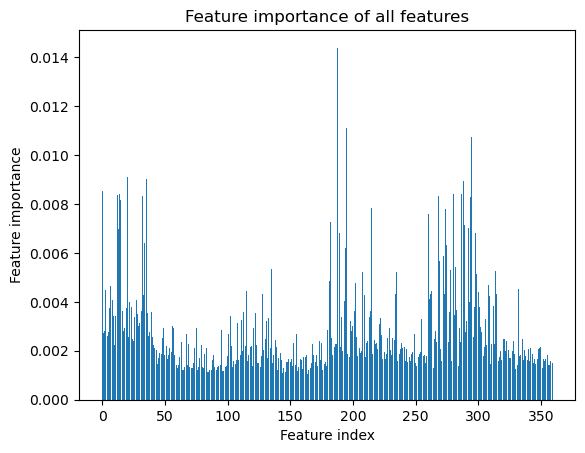

The current number of training feature after feature selection is:  120


In [109]:
# Feature selection by extra tree classifier

print("The original number of training feature is: ", X_train_scaled.shape[1])
clf_etc = ExtraTreesClassifier(random_state=random_state).fit(X_train_scaled, y_train) # fit the model
feature_importances = clf_etc.feature_importances_  # get the feature importance

plt.bar(range(len(feature_importances)), feature_importances)   # plot the feature importance
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.title("Feature importance of all features")
plt.show()

important_feature_indices=np.argsort(feature_importances)   # sort the feature importance  
important_feature_indices_cut=important_feature_indices[:int(len(important_feature_indices)/1.5)]   # select the most important features  

X_train_selected=np.delete(X_train_scaled,important_feature_indices_cut,1)    # delete the least important features
X_test_selected=np.delete(X_test_scaled,important_feature_indices_cut,1)      # delete the least important features
print("The current number of training feature after feature selection is: ", X_train_selected.shape[1])

In [110]:
# Generate the performance value and confusion matrix 

def performance_eval(true, pred, score_display=True, matrix_display=False, result_return=False):
    Accuracy = accuracy_score(true, pred)
    F1 = accuracy_score(true, pred)
    Precision = accuracy_score(true, pred)
    Recall = accuracy_score(true, pred)
    
    if score_display==True:
        print("Accuracy: " + str(Accuracy))
        print("F1 score: " + str(F1))
        print("Recall score: " + str(Recall))
        print("Precision score: " + str(Precision))
        
    if matrix_display==True:
        label = ['Non-seizure', 'Transition','Seizure']
        cm = confusion_matrix(true, pred)
        cm_display = ConfusionMatrixDisplay(cm, display_labels=label).plot()
        plt.show(cm_display)
    
    if result_return:
        return Accuracy, F1, Precision, Recall

Accuracy: 0.8229948066935949
F1 score: 0.8229948066935949
Recall score: 0.8229948066935949
Precision score: 0.8229948066935949


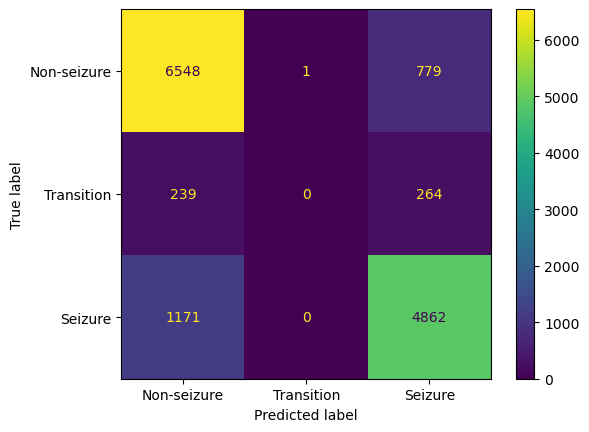

In [111]:
#Logistic regression model construction for all train sets
clf_lr = LogisticRegression(max_iter=1000, random_state=random_state).fit(X_train_selected, y_train)
# Generate the performance value and confusion matrix on test set

y_pred = clf_lr.predict(X_test_selected)
performance_eval(y_test, y_pred, matrix_display=True)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Accuracy: 0.8220571263704558
F1 score: 0.8220571263704558
Recall score: 0.8220571263704558
Precision score: 0.8220571263704558


C:\Users\skyho\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


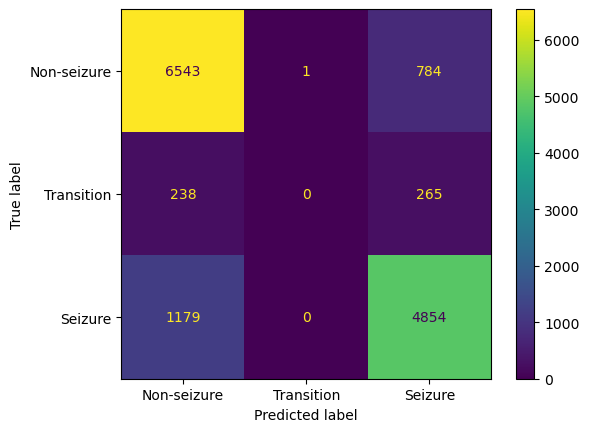

-----------------Logistic Regression Summary-----------------
Best parameters: {'penalty': 'elasticnet', 'l1_ratio': 0.9385, 'C': 0.9516998480943455}
Best score in cross validation process: 0.8272025460131893
Accuracy in test set with best parameters: 0.8220571263704558
-------------------------------------------------------------


In [112]:
# Random search for hyperparameter tuning

n_iter_search = 3 # number of iterations for random search
clf_lr_rs = LogisticRegression(max_iter=500, solver='saga') # define the model

# define the hyperparameter space
C = 1/np.power(10, np.arange(-4, 1, 1e-4))  
param_dist = {"penalty": ['l1', 'l2', 'elasticnet', None],
              "C": C,
              "l1_ratio": np.arange(0, 1, 1e-4)}

# random search
random_search = RandomizedSearchCV(clf_lr_rs, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, verbose=3, n_jobs=8,
                                   random_state=random_state)

random_search.fit(X_train_selected, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

# Generate the performance value and confusion matrix on test set

y_pred = random_search.predict(X_test_selected)
Accuracy, F1, Precision, Recall=performance_eval(y_test, y_pred, matrix_display=True, result_return=True)

#linear regression summary

print("-----------------Logistic Regression Summary-----------------")
print("Best parameters:", best_params)
print("Best score in cross validation process:", best_score)
print("Accuracy in test set with best parameters: " + str(Accuracy))
print("-------------------------------------------------------------")